In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [22]:
df_train = pd.read_csv('../input/train.csv')
print(df_train.shape)
display(df_train.head(100))

/home/m-fuj/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(509762, 49)


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017090700,20170907000395,away,36.19,10.91,1.54,1.14,0.29,341.17,90.11,2552652,Chris Conley,17,2017,25,1,12:08:00,KC,1,10,KC,7,0,2557917,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",right,2017-09-08T00:53:14.000Z,2017-09-08T00:53:13.000Z,7,6-3,205,10/25/1992,Georgia,WR,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
96,2017090700,20170907000395,away,34.18,24.54,2.96,1.64,0.31,64.39,172.91,2552668,Mitch Morse,61,2017,25,1,12:08:00,KC,1,10,KC,7,0,2557917,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",right,2017-09-08T00:53:14.000Z,2017-09-08T00:53:13.000Z,7,6-6,305,04/21/1992,Missouri,C,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
97,2017090700,20170907000395,away,33.80,37.41,2.56,1.47,0.49,352.54,43.82,2554630,Ross Travis,88,2017,25,1,12:08:00,KC,1,10,KC,7,0,2557917,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",right,2017-09-08T00:53:14.000Z,2017-09-08T00:53:13.000Z,7,6-6,248,01/09/1993,Penn State,TE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
98,2017090700,20170907000395,away,29.99,27.12,3.90,2.53,0.44,34.27,157.92,2557917,Kareem Hunt,27,2017,25,1,12:08:00,KC,1,10,KC,7,0,2557917,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",right,2017-09-08T00:53:14.000Z,2017-09-08T00:53:13.000Z,7,5-11,216,08/06/1995,Toledo,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and

### 各PlayIdは、22選手ごとにデータがある

In [11]:
cnt_playid = df_train.groupby('PlayId').count()
display(cnt_playid)

# 22以外ある場合、エラー出力
assert cnt_playid[cnt_playid['GameId']!=22].sum().sum()==0

,GameId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
PlayId,,,,,,,,,,,,,,,,,,,,,
20170907000118,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
20170907000139,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
20170907000189,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
20170907000345,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
20170907000395,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181230153910,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
20181230154035,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
20181230154082,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


### 各PlayIdごとに、away, homeそれぞれ11人になっている

In [12]:
cnt_playid_team = df_train.groupby(['PlayId', 'Team']).count()
display(cnt_playid_team)

# 11以外ある場合、エラー出力
assert cnt_playid_team[cnt_playid_team['GameId']!=11].sum().sum()==0

GameId   X   Y   S   A  Dis  Orientation  Dir  NflId  \
PlayId         Team                                                         
20170907000118 away      11  11  11  11  11   11           11   11     11   
               home      11  11  11  11  11   11           11   11     11   
20170907000139 away      11  11  11  11  11   11           11   11     11   
               home      11  11  11  11  11   11           11   11     11   
20170907000189 away      11  11  11  11  11   11           11   11     11   
...                     ...  ..  ..  ..  ..  ...          ...  ...    ...   
20181230154082 home      11  11  11  11  11   11           11   11     11   
20181230154135 away      11  11  11  11  11   11           11   11     11   
               home      11  11  11  11  11   11           11   11     11   
20181230154157 away      11  11  11  11  11   11           11   11     11   
               home      11  11  11  11  11   11           11   11     11   

                     DisplayName  ...  Week  Stadium  Location  StadiumType  \
PlayId         Team               ...                                         
20170907000118 away           11  ...    11       11        11           11   
               home           11  ...    11       11        11           11   
20170907000139 away           11  ...    11       11        11           11   
               home           11  ...    11       11        11           11   
20170907000189 away           11  ...    11       11        11           11   
...                          ...  ...   ...      ...       ...          ...   
20181230154082 home           11  ...    11       11        11           11   
20181230154135 away           11  ...    11       11        11           11   
               home           11  ...    11       11        11           11   
20181230154157 away           11  ...    11       11        11           11   
               home           11  ...    11       11        11           11   

                     Turf  GameWeather  Temperature  Humidity  WindSpeed  \
PlayId         Team                                                        
20170907000118 away    11           11           11        11         11   
               home    11           11           11        11         11   
20170907000139 away    11           11           11        11         11   
               home    11           11           11        11         11   
20170907000189 away    11           11           11        11         11   
...                   ...          ...          ...       ...        ...   
20181230154082 home    11           11           11        11         11   
20181230154135 away    11           11           11        11         11   
               home    11           11           11        11         11   
20181230154157 away    11           11           11        11         11   
               home    11           11           11        11         11   

                     WindDirection  
PlayId         Team                 
20170907000118 away             11  
               home             11  
20170907000139 away             11  
               home             11  
20170907000189 away             11  
...                            ...  
20181230154082 home             11  
20181230154135 away             11  
               home             11  
20181230154157 away             11  
               home             11  

[46342 rows x 47 columns]

In [28]:
cnt_playid_team = df_train.groupby(['GameId', 'PlayId', 'Team', 'PlayDirection']).count()
display(cnt_playid_team)

# 11以外ある場合、エラー出力
assert cnt_playid_team[cnt_playid_team['X']!=11].sum().sum()==0

X   Y   S   A  Dis  \
GameId     PlayId         Team PlayDirection                        
2017090700 20170907000118 away left           11  11  11  11   11   
                          home left           11  11  11  11   11   
           20170907000139 away left           11  11  11  11   11   
                          home left           11  11  11  11   11   
           20170907000189 away left           11  11  11  11   11   
...                                           ..  ..  ..  ..  ...   
2018123015 20181230154082 home right          11  11  11  11   11   
           20181230154135 away right          11  11  11  11   11   
                          home right          11  11  11  11   11   
           20181230154157 away right          11  11  11  11   11   
                          home right          11  11  11  11   11   

                                              Orientation  Dir  NflId  \
GameId     PlayId         Team PlayDirection                            
2017090700 20170907000118 away left                    11   11     11   
                          home left                    11   11     11   
           20170907000139 away left                    11   11     11   
                          home left                    11   11     11   
           20170907000189 away left                    11   11     11   
...                                                   ...  ...    ...   
2018123015 20181230154082 home right                   11   11     11   
           20181230154135 away right                   11   11     11   
                          home right                   11   11     11   
           20181230154157 away right                   11   11     11   
                          home right                   11   11     11   

                                              DisplayName  JerseyNumber  \
GameId     PlayId         Team PlayDirection                              
2017090700 20170907000118 away left                    11            11   
                          home left                    11            11   
           20170907000139 away left                    11            11   
                          home left                    11            11   
           20170907000189 away left                    11            11   
...                                                   ...           ...   
2018123015 20181230154082 home right                   11            11   
           20181230154135 away right                   11            11   
                          home right                   11            11   
           20181230154157 away right                   11            11   
                          home right                   11            11   

                                              Season  YardLine  Quarter  \
GameId     PlayId         Team PlayDirection                              
2017090700 20170907000118 away left               11        11       11   
                          home left               11        11       11   
           20170907000139 away left               11        11       11   
                          home left               11        11       11   
           20170907000189 away left               11        11       11   
...                                              ...       ...      ...   
2018123015 20181230154082 home right              11        11       11   
           20181230154135 away right              11        11       11   
                          home right              11        11       11   
           20181230154157 away right              11        11       11   
                          home right              11        11       11   

                                              GameClock  PossessionTeam  Down  \
GameId     PlayId         Team PlayDirection                                    
2017090700 20170907000118 away left                  11              11    11   
    

### evaluation
- ガウス分布による予測
- https://www.kaggle.com/hukuda222/nfl-simple-evluation-trick

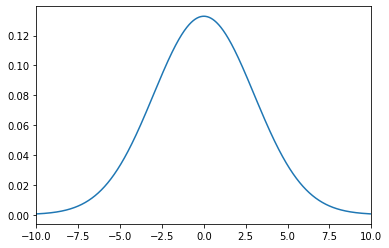

In [20]:
from scipy.stats import norm
x = np.arange(-10,10,0.01)
y = norm.pdf(x,0,3)
plt.plot(x,y)
plt.xlim(-10,10)
plt.show()

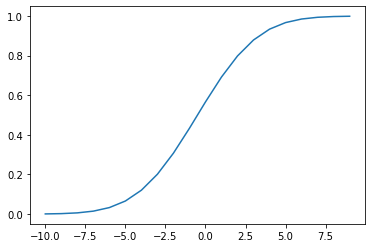

In [19]:
from scipy.stats import norm

norm_cumsum = np.cumsum(norm.pdf(np.arange(-10,10,1),0,3))
plt.plot(np.arange(-10,10,1), norm_cumsum)
plt.show()